In [1]:
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd
import numpy as np

In [3]:
import json
from pprint import pprint

with open('/Users/danielkershaw/PycharmProjects/DiffusionSimulation/data/diffusion-prediction-data/reddit-traversal-2') as data_file:    
    data = json.load(data_file)
    
result_act = pd.read_json(data["result_act"]).sort_index()
result_user = pd.read_json(data["result_user"]).sort_index()

df_gt = pd.read_csv("/Users/danielkershaw/Downloads/reddit_tagged_count", sep="\001", names=["word","tag","count"])
f = df_gt[df_gt["count"] > 10]
idx = f.groupby(['word'])['count'].transform(max) == f['count']
v = f[idx]

result_act = result_act.join(v.set_index(["word"]), on='word', rsuffix="w")
result_user = result_user.join(v.set_index(["word"]), on='word', rsuffix="w")

/Users/danielkershaw/Virtualenvs/DiffusionSimulation/lib/python2.7/site-packages/pandas/tools/merge.py:714: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  rlab = rizer.factorize(rk)


In [23]:
result_act_val_dict = {}
result_act_feature_importance_dict = {}
result_act_idx_dict = {}
result_act_features = ["usagedominance", "usageEntorpy", "avrageActivateionExposure"]
# result_act_features = ["usagedominance", "usageEntorpy"]

for t in set(result_act["tag"].values):
    result_act_val = []
    result_act_feature_importance = []
    result_act_idx = []
    rat = result_act[(result_act["word"].isin(v["word"])) & (result_act["tag"] == t)]
    for above in range(50, 100):
        rat['is_train'] = np.random.uniform(0, 1, len(rat)) <= .75
        f = lambda x: x > above
        rat["70"] = rat["depth"].apply(f)
        train, test = rat[rat['is_train']==True], rat[rat['is_train']==False]
        if len(test) > 0 and len(train) > 0:
            clf = RandomForestClassifier(n_jobs=2, class_weight="balanced")
            y, _ = pd.factorize(train['70'])
            clf.fit(train[result_act_features], y)
            preds = [True if x == 1 else False for x in clf.predict(test[result_act_features])]
            p, r, s, f = precision_recall_fscore_support(test['70'], pd.Series(preds).values, labels=[True, False], average='binary')
            result_act_val.append([p,r])
            result_act_idx.append(above)
            result_act_feature_importance.append(clf.feature_importances_)
    result_act_val_dict[t] = result_act_val
    result_act_feature_importance_dict[t] = result_act_feature_importance_dict
    result_act_idx_dict[t] = result_act_features

/Users/danielkershaw/Virtualenvs/DiffusionSimulation/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/danielkershaw/Virtualenvs/DiffusionSimulation/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [29]:
for t in result_act_val_dict:

{'!': [[0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [1.0, 0.090909090909090912],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [1.0, 0.066666666666666666],
  [1.0, 0.076923076923076927],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [1.0, 0.083333333333333329],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [1.0, 0.076923076923076927],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.5, 0.0625],
  [1.0, 0.055555555555555552],
  [0.5, 0.071428571428571425],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.66666666666666663, 0.20000000000000001],
  [0.0, 0.0],
  [1.0, 0.40000000000000002],
  [0.5, 0.14285714285714285]],
 '#': [[0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.

In [28]:
pd.DataFrame(result_act_val_dict)

ValueError: arrays must all be same length

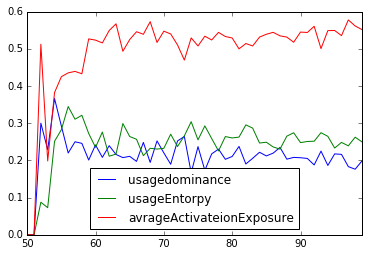

In [20]:
result_act_features_df = pd.DataFrame(result_act_feature_importance, index=result_act_idx, columns=result_act_features)
result_act_features_df.plot()

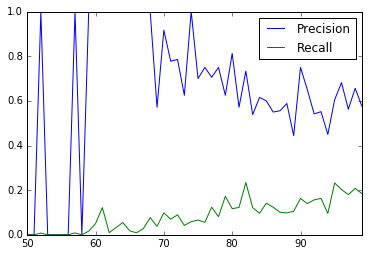

In [21]:
result_act_df = pd.DataFrame(result_act_val, index=result_act_idx, columns=["Precision", "Recall"])
result_act_df.plot()

In [30]:
result_user_val = []
result_user_idx = []
result_user_feature_importance = []
result_user_features = ["userusagedominance", "userUsageEntorpy", "avrageUserExposure"]

rut = result_user[(result_user["word"].isin(v["word"])) & (result_user["tag"] == "A")]

for above in range(50, 100):
    rut['is_train'] = np.random.uniform(0, 1, len(rut)) <= .75
    f = lambda x: x > above
    rut["70"] = rut["depth"].apply(f)
    train, test = rut[rut['is_train']==True], rut[rut['is_train']==False]
    clf = RandomForestClassifier(n_jobs=2, class_weight="balanced")
    y, _ = pd.factorize(train['70'])
    clf.fit(train[result_user_features], y)
    preds = [True if x == 1 else False for x in clf.predict(test[result_user_features])]
    p, r, s, f = precision_recall_fscore_support(test['70'], pd.Series(preds).values, labels=[True, False], average='binary')
    result_user_val.append([p,r])
    result_user_idx.append(above)
    result_user_feature_importance.append(clf.feature_importances_)

/Users/danielkershaw/Virtualenvs/DiffusionSimulation/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/danielkershaw/Virtualenvs/DiffusionSimulation/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


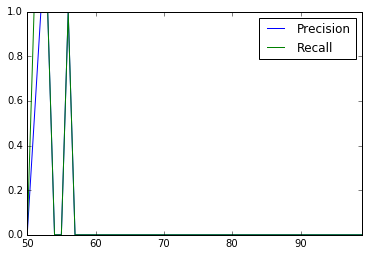

In [31]:
result_user_df = pd.DataFrame(result_user_val, index=result_user_idx, columns=["Precision", "Recall"])
result_user_df.plot()

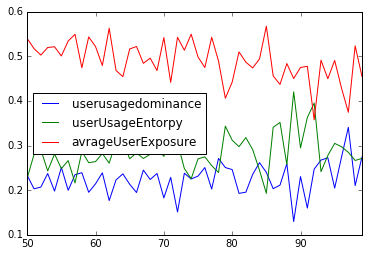

In [14]:
result_user_features_df = pd.DataFrame(result_user_feature_importance, index=result_user_idx, columns=result_user_features)
result_user_features_df.plot()

In [49]:
clf.

3